![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# read the csv file 
crimes = pd.read_csv('crimes.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC':str})

In [ ]:
crimes.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


<br><be>
## Dataset basic info

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131382 entries, 0 to 131381
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         131382 non-null  int64         
 1   Date Rptd     131382 non-null  datetime64[ns]
 2   DATE OCC      131382 non-null  datetime64[ns]
 3   TIME OCC      131382 non-null  object        
 4   AREA NAME     131382 non-null  object        
 5   Crm Cd Desc   131382 non-null  object        
 6   Vict Age      131382 non-null  int64         
 7   Vict Sex      131372 non-null  object        
 8   Vict Descent  131374 non-null  object        
 9   Weapon Desc   50896 non-null   object        
 10  Status Desc   131382 non-null  object        
 11  LOCATION      131382 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 12.0+ MB


In [ ]:
# number of null values
crimes.isna().sum()

DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA NAME           0
Crm Cd Desc         0
Vict Age            0
Vict Sex           10
Vict Descent        8
Weapon Desc     80486
Status Desc         0
LOCATION            0
dtype: int64

<br><br>
# Exploratory Data Analysis

<br><br>
## Number of victims by gender

In [ ]:
crimes['Vict Sex'].value_counts()

Vict Sex
M    65665
F    63770
X     1913
H       24
Name: count, dtype: int64

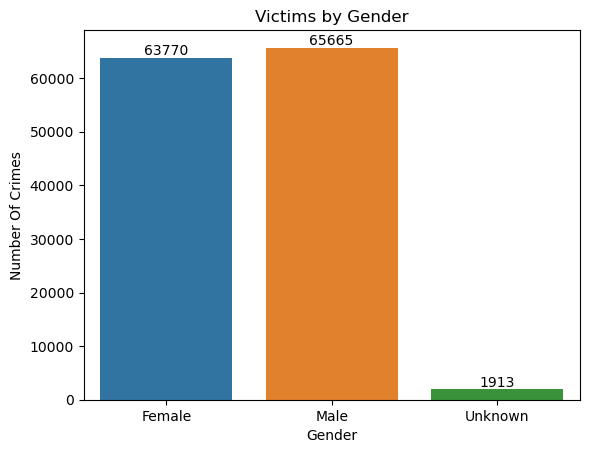

In [ ]:
# Filter unspecified gender data

gender_filter_crimes = crimes[crimes['Vict Sex'] != "H"]
ax = sns.countplot(data=gender_filter_crimes, x='Vict Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Victims by Gender")
plt.xlabel("Gender")
plt.ylabel("Number Of Crimes")
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Unknown'])
plt.show()

From the above graphs, we can see that most of the crime victims are Male and Female almost equal.

<br><br>
## Number of Victim's by Descent

In [ ]:
top_descents = crimes.groupby('Vict Descent')['Vict Descent'].count()
top_descents = top_descents.sort_values(ascending=False).head(5)
top_descents = top_descents.reset_index(name='Count')

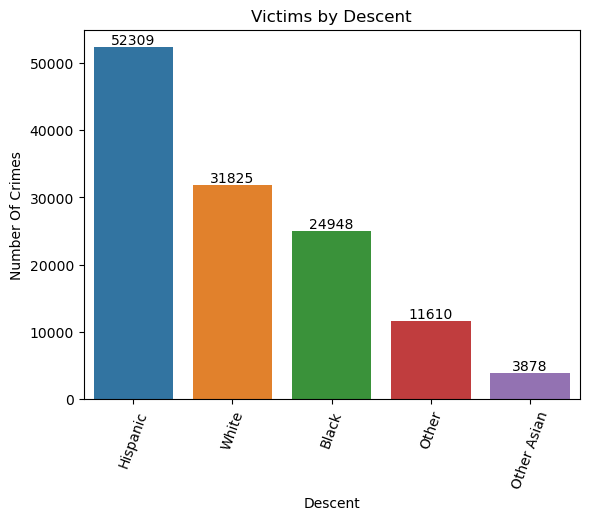

In [ ]:
ax = sns.barplot(data=top_descents, x='Vict Descent', y='Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Victims by Descent")
plt.xlabel("Descent")
plt.ylabel("Number Of Crimes")
plt.xticks(ticks=[0, 1, 2,3,4], labels=['Hispanic', 'White', 'Black', 'Other', 'Other Asian'])
plt.xticks(rotation=70)
plt.show()

From the above graphs, we can see that most of the crime victims are Hispanic Descent.

<br><be>
## The highest frequency of crimes by hour

In [ ]:
crimes['crime_occ_hour'] = crimes['TIME OCC'].str[:2].astype(int)

In [ ]:
crimes.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,crime_occ_hour
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


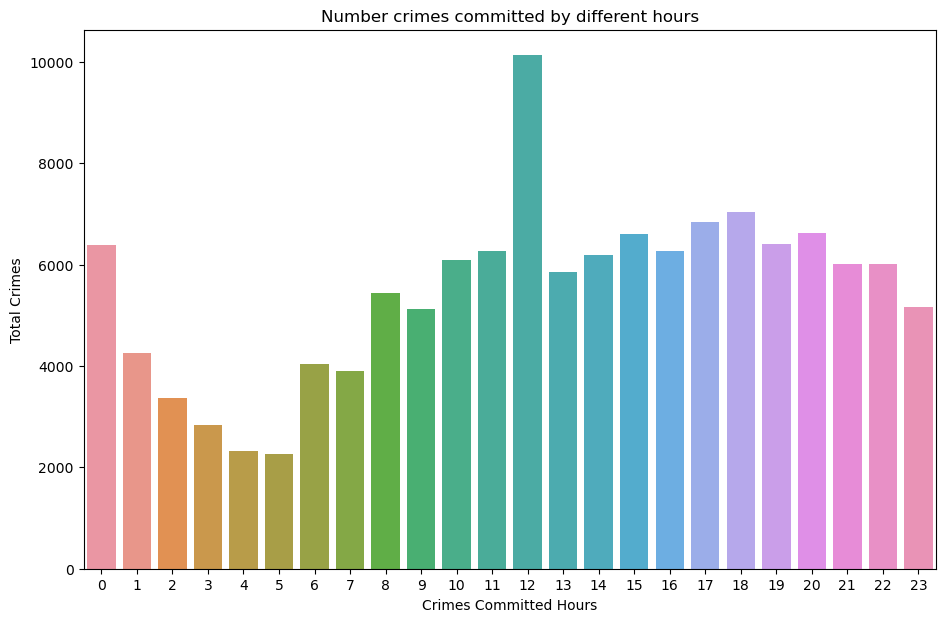

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(data=crimes, x="crime_occ_hour")
plt.title("Number crimes committed by different hours")
plt.xlabel('Crimes Committed Hours')  
plt.ylabel('Total Crimes')
plt.show()

<br> <br>
## Find the largest crime frequency area of the night

In [ ]:
nigt_time_crimes = crimes[(crimes['crime_occ_hour'] >= 22) | (crimes['crime_occ_hour'] < 4)]

In [ ]:
freq_night_crimes_area = nigt_time_crimes.groupby('AREA NAME', as_index=False)['crime_occ_hour'].count()

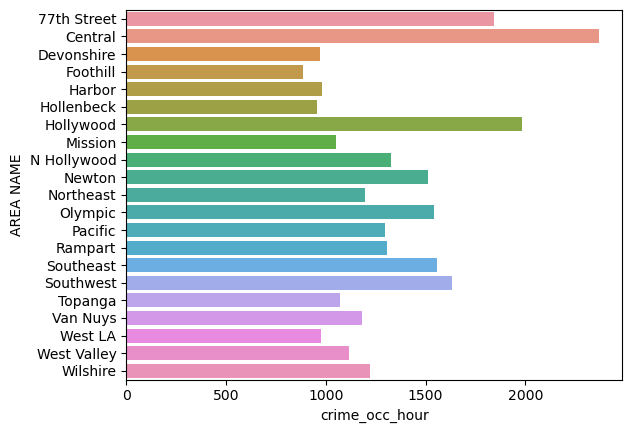

In [ ]:
sns.barplot(data=freq_night_crimes_area, y="AREA NAME", x='crime_occ_hour')
plt.show()

In [ ]:
frq_nigh_crimes_area_name = freq_night_crimes_area.sort_values(by='crime_occ_hour', ascending=False).values[0][0]
print(f"\nThe area with the largest volume of night crime is {frq_nigh_crimes_area_name}")


The area with the largest volume of night crime is Central


<br><br>
## Find victim age group

In [ ]:
age_group_names = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]


In [ ]:
age_0_17 = crimes['Vict Age'] <= 17
age_18_25 = (crimes['Vict Age'] >= 18) & (crimes['Vict Age'] <= 25)
age_26_34 = (crimes['Vict Age'] >= 26) & (crimes['Vict Age'] <= 34)
age_35_44 = (crimes['Vict Age'] >= 35) & (crimes['Vict Age'] <= 44)
age_45_54 = (crimes['Vict Age'] >= 45) & (crimes['Vict Age'] <= 54)
age_55_64 = (crimes['Vict Age'] >= 55) & (crimes['Vict Age'] <= 64)
age_65_plus = crimes['Vict Age'] >= 65

In [ ]:
conditions = [
    age_0_17, age_18_25, age_26_34, age_35_44, age_45_54, age_55_64, age_65_plus
]

In [ ]:
crimes['age_group'] = np.select(conditions, age_group_names, default="")
crimes.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,crime_occ_hour,age_group
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


In [ ]:
victim_ages = crimes.groupby('age_group')['age_group'].count()

In [ ]:
victim_ages

age_group
0-17      3105
18-25    20039
26-34    33563
35-44    30048
45-54    20063
55-64    14320
65+      10244
Name: age_group, dtype: int64

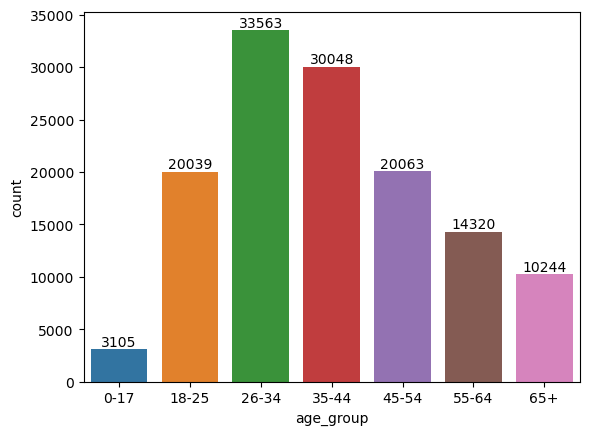

In [ ]:
ax = sns.countplot(data=crimes, x='age_group', order=age_group_names )
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

©MD Abdullah Al Baki